<a href="https://colab.research.google.com/github/taqiyaehsan/cs440/blob/main/CvxOptim_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical Problems

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def gradient_descent_exact_line_search(f, grad_f, x0, tol=1e-6, max_iter=1000):
    iterates = [x0.copy()]
    for i in range(max_iter):
        gradient = grad_f(x0)
        step_size = exact_line_search(x0, f, grad_f)
        x0 = x0 - step_size * gradient
        iterates.append(x0.copy())
        if np.linalg.norm(gradient) < tol:
            break
    return iterates

def gradient_descent_backtracking_line_search(f, grad_f, x0, alpha=0.1, beta=0.7, tol=1e-6, max_iter=1000):
    iterates = [x0.copy()]
    for i in range(max_iter):
        gradient = grad_f(x0)
        step_size = backtracking_line_search(f, grad_f, x0, alpha, beta)
        x0 = x0 - step_size * gradient
        iterates.append(x0.copy())
        if np.linalg.norm(gradient) < tol:
            break
    return iterates

# Exact Line Search
def exact_line_search(x, f, grad_f, grid_search_step=0.0003):
    t_values = np.arange(start=0, stop=1, step=grid_search_step)

    # Store the best alpha and the corresponding function value
    optimal_t = None
    best_function_value = np.inf

    # Run a grid search over t's
    for t in t_values:
        new_point = x - t * grad_f(x)
        new_function_value = f(new_point)

        # If we have found a more optimal t
        if new_function_value < best_function_value:
            optimal_t = t
            best_function_value = new_function_value

    return optimal_t

# Backtracking Line Search
def backtracking_line_search(f, grad_f, x, alpha, beta):
    step_size = 1.0
    while f(x - step_size * grad_f(x)) > f(x) - alpha * step_size * np.linalg.norm(grad_f(x))**2:
        step_size *= beta
    return step_size

In [35]:
def plot_contours_and_iterations(x_vals, y_vals, func, grad_func, title, levels, gamma=None):

    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(np.vstack([X.ravel(), Y.ravel()]))
    Z = Z.reshape(X.shape)

    plt.grid(True)
    plt.contour(X, Y, Z, levels, cmap='viridis', linestyles='dashed')
    plt.title(title)

def plot_iterations(iterates, label):
    iterates = np.array(iterates)
    plt.plot(iterates[:, 0], iterates[:, 1], label=label, marker='o', linestyle='-')

def plot_optimality_gaps(iterates_exact, iterates_backtracking, f, title, p_star = 0):

    # Compute error values
    function_values_exact = np.array([f(iterate) for iterate in iterates_exact])
    function_values_backtracking = np.array([f(iterate) for iterate in iterates_backtracking])

    optimality_gaps_exact = np.abs(function_values_exact - p_star)
    optimality_gaps_backtracking = np.abs(function_values_backtracking - p_star)

    plt.title(title)

    # Use scatter plot for exact line search
    plt.scatter(range(len(iterates_exact)), optimality_gaps_exact, marker='o', label='Exact Line Search', color='blue')

    # Use scatter plot for backtracking line search
    plt.scatter(range(len(iterates_backtracking)), optimality_gaps_backtracking, marker='o', label='Backtracking Line Search', color='orange')

    # Connect the scatters with lines
    plt.plot(range(len(iterates_exact)), optimality_gaps_exact, linestyle='-', color='blue')
    plt.plot(range(len(iterates_backtracking)), optimality_gaps_backtracking, linestyle='-', color='orange')

    plt.xlabel('Iteration')
    plt.ylabel('Optimality Gap')
    plt.yscale('log')
    plt.legend()

In [30]:
def quadratic_function(x, gamma=10):
    return 0.5 * (x[0]**2 + gamma * x[1]**2)

def grad_quadratic_function(x, gamma=10):
    return np.array([x[0], gamma*x[1]])

def non_quadratic_function(x):
    return np.exp(x[0] + 3*x[1] - 0.1) + np.exp(x[0] - 3*x[1] - 0.1) + np.exp(-x[0] - 0.1)

def grad_non_quadratic_function(x):
    return np.array([
        [np.exp(x[0, 0] + 3 * x[1, 0] - 0.1) + np.exp(x[0, 0] - 3 * x[1, 0] - 0.1) - np.exp(-x[0, 0] - 0.1)],
        [3 * (np.exp(x[0, 0] + 3 * x[1, 0] - 0.1) - np.exp(x[0, 0] - 3 * x[1, 0] - 0.1))]
    ])

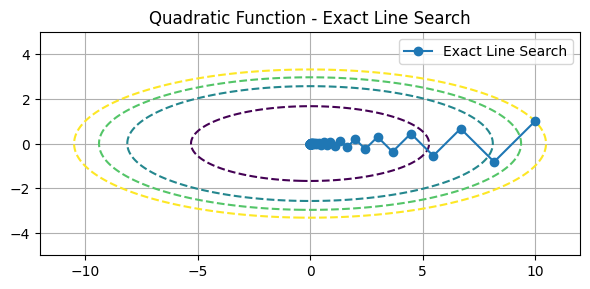

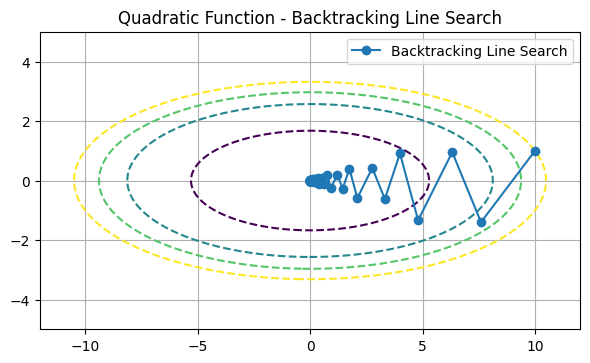

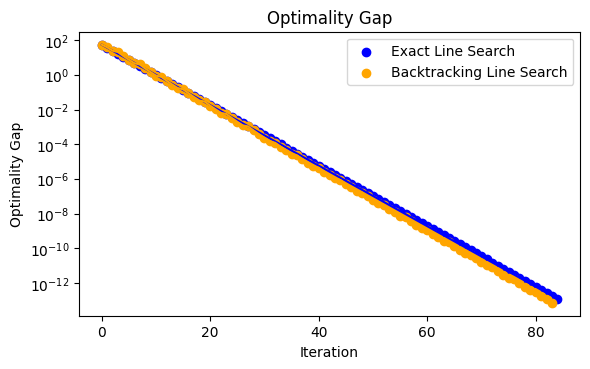

In [38]:
# Test on Quadratic Function
plt.figure(figsize=(6, 8))

initial_point = np.array([[10], [1]])
iterates_exact_quad = gradient_descent_exact_line_search(quadratic_function, grad_quadratic_function, initial_point)
iterates_backtracking_quad = gradient_descent_backtracking_line_search(quadratic_function, grad_quadratic_function, initial_point)

x1 = np.linspace(-12, 12, 2000)
x2 = np.linspace(-5, 5, 2000)

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

plt.subplot(gs[0])
plot_contours_and_iterations(x1, x2, quadratic_function, grad_quadratic_function, 'Quadratic Function - Exact Line Search', levels = [14, 33, 44, 55])
plot_iterations(iterates_exact_quad, label='Exact Line Search')
plt.legend()
plt.tight_layout()
plt.show()

plt.subplot(gs[1])
plot_contours_and_iterations(x1, x2, quadratic_function, grad_quadratic_function, 'Quadratic Function - Backtracking Line Search', levels = [14, 33, 44, 55])
plot_iterations(iterates_backtracking_quad, label='Backtracking Line Search')
plt.legend()
plt.tight_layout()
plt.show()

plt.subplot(gs[2])
plot_optimality_gaps(iterates_exact_quad, iterates_backtracking_quad, quadratic_function, 'Optimality Gap')
plt.legend()
plt.tight_layout()
plt.show()

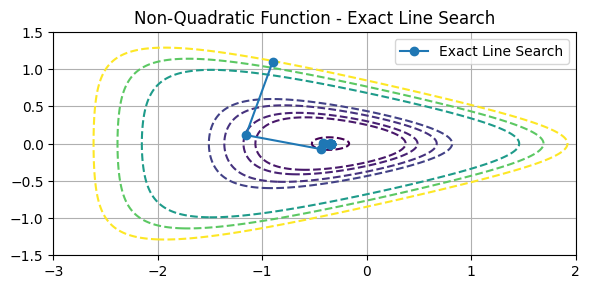

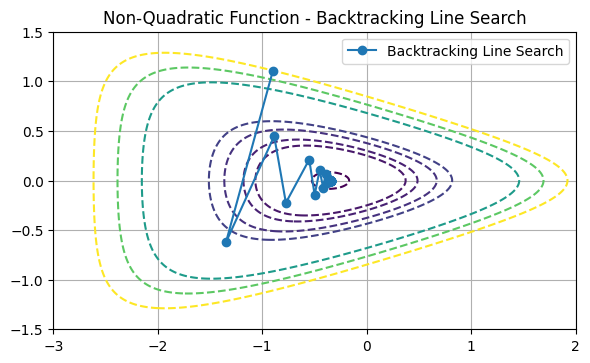

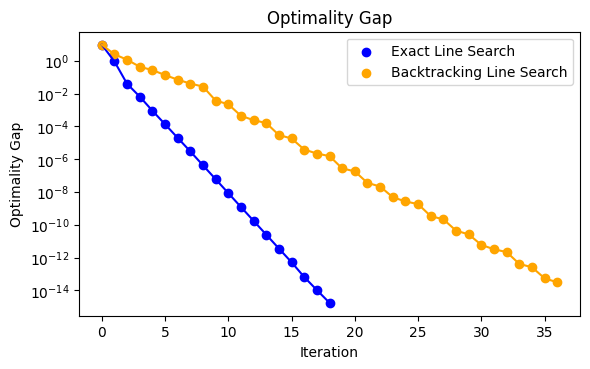

In [41]:
# Test on Non-Quadratic Function
plt.figure(figsize=(6, 8))

initial_point = np.array([[-0.9], [1.1]])
iterates_exact_non_quad = gradient_descent_exact_line_search(non_quadratic_function, grad_non_quadratic_function, initial_point)
iterates_backtracking_non_quad = gradient_descent_backtracking_line_search(non_quadratic_function, grad_non_quadratic_function, initial_point)

x1 = np.linspace(-3, 2, 2000)
x2 = np.linspace(-1.5, 1.5, 2000)

gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1])

plt.subplot(gs[0])
plot_contours_and_iterations(x1, x2, non_quadratic_function, grad_non_quadratic_function, 'Non-Quadratic Function - Exact Line Search', levels = [2.6, 3.25, 3.5, 4, 4.5, 8, 10, 12.5])
plot_iterations(iterates_exact_non_quad, label='Exact Line Search')
plt.legend()
plt.tight_layout()
plt.show()

plt.subplot(gs[1])
plot_contours_and_iterations(x1, x2, non_quadratic_function, grad_non_quadratic_function, 'Non-Quadratic Function - Backtracking Line Search', levels = [2.6, 3.25, 3.5, 4, 4.5, 8, 10, 12.5])
plot_iterations(iterates_backtracking_non_quad, label='Backtracking Line Search')
plt.legend()
plt.tight_layout()
plt.show()

plt.subplot(gs[2])
plot_optimality_gaps(iterates_exact_non_quad, iterates_backtracking_non_quad, non_quadratic_function, 'Optimality Gap', p_star=non_quadratic_function([-0.5 * np.log(2), 0]))
plt.legend()
plt.tight_layout()
plt.show()